In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import numpy as np
import pandas as pd
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data1 = np.load("/home/agajan/DeepMRI/DiffusionMRI/scripts/ConvModel1_prelu_h_search_neighboring.npz")
data2 = np.load("/home/agajan/DeepMRI/DiffusionMRI/scripts/ConvModel1_prelu_h_search_fullbrain.npz")
n = len(data1["scores"])
data = []
for i in range(n):
    data += [[data1["dims"][i], data1["scores"][i], "Neighboring slices"]]
    data += [[data2["dims"][i], data2["scores"][i], "Full brain"]]

df = pd.DataFrame(data, columns=["h-channels", "DICE score", "Test set"])
df.head()

,h-channels,DICE score,Test set
0,1,0.156073,Neighboring slices
1,1,0.140621,Full brain
2,2,0.305844,Neighboring slices
3,2,0.229035,Full brain
4,3,0.400544,Neighboring slices


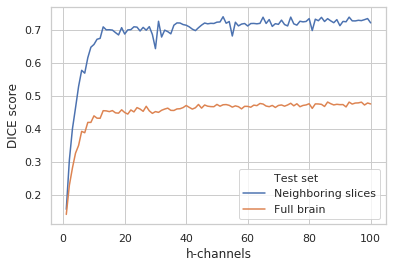

In [3]:
sns.set(style="whitegrid")
sns.lineplot(x="h-channels", y="DICE score", data=df, hue="Test set")

In [11]:
ss = [s for s in data1["scores"]]
bi = np.argmax(ss)
print(bi + 1, ss[bi])

52 0.7406563203583791


In [24]:
import math
ss = [math.floor(s*100) for s in data2["scores"]]
ss[85] = 0
bi = np.argmax(ss)
print(bi + 1, ss[bi])

93 48


In [31]:
data1["scores"][21], data2["scores"][21]

(0.7015004748109545, 0.4577389085647242)